In [79]:
from sklearn import datasets, ensemble, model_selection, tree
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X, y = datasets.load_digits(return_X_y=True)

In [57]:
clf = tree.DecisionTreeClassifier(random_state=0)

In [30]:
cv = model_selection.cross_val_score(clf, X, y, cv=10)

In [31]:
cv.mean()

0.8241247672253259

In [54]:
bg = ensemble.BaggingClassifier(clf, n_estimators=100, random_state=0)
cv = model_selection.cross_val_score(bg, X, y, cv=10)
print(cv.mean())

0.927048417132216


In [65]:
bg_sqrt = ensemble.BaggingClassifier(clf, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
cv = model_selection.cross_val_score(bg_sqrt, X, y, cv=10, n_jobs=-1)
print(cv.mean())

0.9321166977032898


In [69]:
clf_sqrt = tree.DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))
bg_rf = ensemble.BaggingClassifier(clf_sqrt, n_estimators=100)
cv = model_selection.cross_val_score(bg_rf, X, y, cv=10, n_jobs=-1)
print(cv.mean())

0.9527032898820608


In [77]:
rf = ensemble.RandomForestClassifier()
train_scores, test_scores = model_selection.validation_curve(rf, X, y, param_name='n_estimators', 
                                                             param_range=np.arange(5, 200, 5), cv=10, n_jobs=-1)

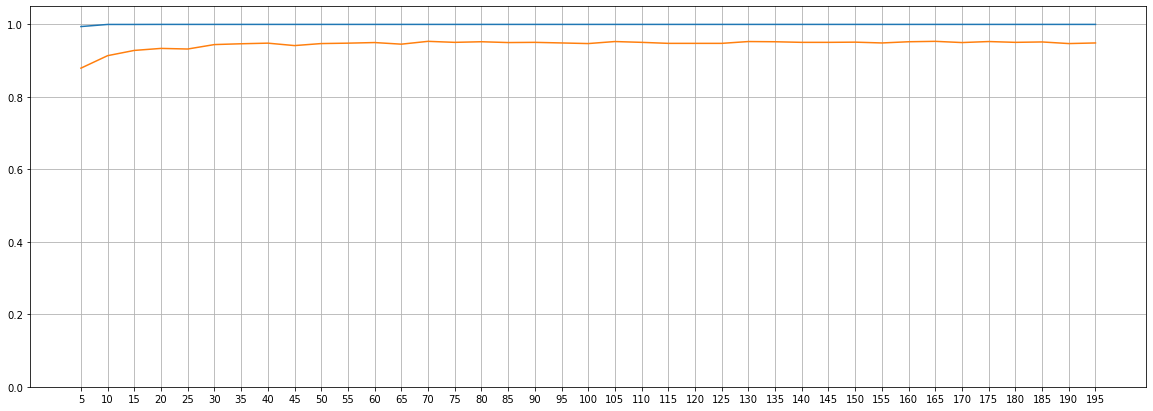

In [101]:
plt.figure(figsize=(20, 7))
plt.plot(estimators, train_scores.mean(axis=1), label='train')
plt.plot(estimators, test_scores.mean(axis=1), label='test')
plt.grid()
plt.ylim(0, 1.05)
plt.xticks(estimators);

In [115]:
train_scores_feat, test_scores_feat = model_selection.validation_curve(rf, X, y, param_name='max_features', 
                                                                      param_range=np.arange(1, 50, 5), 
                                                                      cv=10, n_jobs=-1)

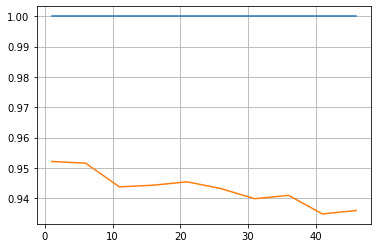

In [117]:
n_feat = np.arange(1, 50, 5)
plt.plot(n_feat, train_scores_feat.mean(axis=1), label='train')
plt.plot(n_feat, test_scores_feat.mean(axis=1), label='test')
plt.grid()
# plt.ylim(0, 1.05)

In [118]:
depths = np.arange(5, 11)
train_scores_depth, test_scores_depth = model_selection.validation_curve(rf, X, y, param_name='max_depth', 
                                                                        param_range=depths, cv=10, n_jobs=-1)

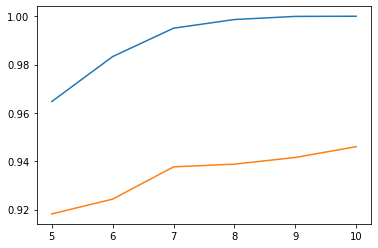

In [120]:
plt.plot(depths, train_scores_depth.mean(axis=1), label='train')
plt.plot(depths, test_scores_depth.mean(axis=1), label='test')

In [121]:
print('2 4 7')

2 4 7
